# 演習課題4回目

11月17日(金)

csvファイル (`blobs.csv`) を読み込み，2つの特徴に対してクラスタリングをする．
標準化していないものとしたものの2種類に対してk-means法を用いて4クラスタへのクラスタリングを行い，散布図を表示せよ．
散布図では各クラスタで色を変えること．

## セットアップ

In [13]:
# Pythonが実行時のバージョンを満たしているか確認する
import sys
assert sys.version_info >= (3, 9, 7)

# 必要なモジュールのインポート
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# サードパーティ製ライブラリが実行時のバージョンを満たしているか確認する
assert np.__version__ >= '1.20.3'
assert pd.__version__ >= '1.3'
assert sklearn.__version__ >= '0.24'

# データの保存場所の定義
DATA_ROOT_PATH = Path('data', '6')

# matplotlib の日本語対応
plt.rcParams['font.family'] = "MS Gothic"


In [14]:
blobs = pd.read_csv(DATA_ROOT_PATH/'blobs.csv')
X = blobs.to_numpy()


## 標準化していないクラスタリング

In [15]:
from sklearn.cluster import KMeans

kmeans_noscaling = KMeans(n_clusters=4)
kmeans_noscaling.fit(X)
kmeans_noscaling.cluster_centers_


array([[ -8.90902312, -19.6996885 ],
       [  4.78515   , -52.1640141 ],
       [ -1.13032988,   1.69771772],
       [ -5.66172302, -33.89010794]])

## 標準化したクラスタリング

講義資料の方法とscikit-learnの`StandardScaler`を用いた方法をそれぞれ示す．

### 講義資料の方法

In [16]:
X_scaled = (X - np.mean(X, axis=0)) / np.std(X)


### StandardScalerを用いた方法

In [17]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


モデルを標準化したデータで訓練する

In [18]:
kmeans_scaling = KMeans(n_clusters=4)
kmeans_scaling.fit(X_scaled)
kmeans_scaling.cluster_centers_


array([[ 1.14814409, -1.3883985 ],
       [-0.476357  ,  0.82994271],
       [-1.33262691, -0.37542683],
       [ 0.65398966,  0.92423965]])

## 結果を図示する

In [19]:
def plot_clustering_results(ax, data: np.ndarray, model,
                            xlabel='feature A', ylabel='feature B'):
    """クラスタリングを行った2次元データの結果を，
    各クラスタで色を変えた散布図としてプロットする．

    Args:
        ax : axesオブジェクト
        data (np.ndarray): クラスタリングモデルの訓練に使用したデータ
        model: `data`によって訓練されたクラスタリングモデル
        xlabel (str, optional): x軸ラベル. Defaults to 'feature A'.
        ylabel (str, optional): y軸ラベル. Defaults to 'feature B'.

    Returns:
        axesオブジェクト
    """
    markers = ['o', 's', '^', 'D']
    colors = ['b', 'g', 'r', 'c']
    labels = model.labels_

    for label in set(labels):
        data_on_label = data[labels == label, :]
        center_x = model.cluster_centers_[label, 0]
        center_y = model.cluster_centers_[label, 1]
        ax.scatter(data_on_label[:, 0], data_on_label[:, 1],
                   alpha=0.3, marker=markers[label], color=colors[label])
        ax.scatter(center_x, center_y, s=100, marker=markers[label], color='k')
    ax.set(xlabel=xlabel, ylabel=ylabel)

    return ax


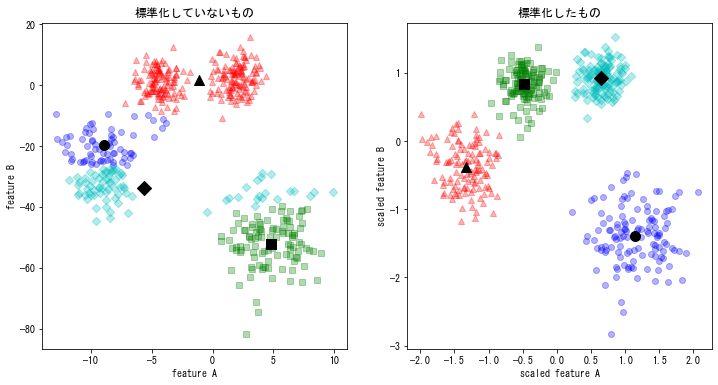

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0] = plot_clustering_results(axs[0], X, kmeans_noscaling)
axs[1] = plot_clustering_results(axs[1], X_scaled, kmeans_scaling,
                                 xlabel='scaled feature A', ylabel='scaled feature B')
axs[0].set_title('標準化していないもの')
axs[1].set_title('標準化したもの')
plt.show()
